#  Закономерности, определяющие успешность игры. 

**Описание проекта:**

 Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xbox или PlayStation). Нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года.

Перечень задач:

   * Изучить общую информацию.
   * Подготовить данные: заменить названия столбцов; преобразовать данные в нужные типы; обработать пропуски при необходимости; посчитайть суммарные продажи во всех регионах и записать их в отдельный столбец.
   * Проанализировать данные: сколько игр выпускалось в разные годы; как менялись продажи по платформам; выбрать актуальный период; какие платформы лидируют по продажам; как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков; общее распределение игр по жанрам; cоставить портрет пользователя каждого региона.
   * Проверить гипотезы: 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 2. Средние пользовательские рейтинги жанров Action и Sports разные.
   * Общий вывод. Что определяет успешность игры? Прогноз на 2017.

## Откройте файл с данными и изучите общую информацию.

In [1]:
import pandas as pd # импорт библиотеки pandas
import numpy as np # импорт библиотеки numpy
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
import seaborn as sns # импорт библиотеки seaborn
from scipy import stats as st # импорт библиотеки scipy
from IPython.display import display_html # импорт библиотеки IPython.display
from itertools import chain,cycle # импорт библиотеки itertools

In [2]:
data = pd.read_csv('***.csv') # чтение файла с данными и сохранение в переменной data
data.info() # получение общей информации о данных в таблице data
data.head(10) # получение первых 10 строк таблицы data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.duplicated().sum() #поиск явных дубликатов

0

Описание данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Из документации известно, что данные за 2016 год могут быть неполными.

**Вывод:**

В таблице представлены данные об играх, вышедших с 1980 по 2016 год. Присутсвуют данные о 16715 игр. Каждая строка - это игра. Есть пропуски и нарушения змеиного регистра. Полных дубликатов нет. Необходимо обработать пропуски, чтобы двигаться дальше.

## Подготовка данных

### Правка столбцов (приведение к нижнему регистру)

In [4]:
data.columns = data.columns.str.lower() # приведение к нижнему регистру

###  Обработка пропусков

In [5]:
data.isna().sum().sort_values(ascending = False) # подсчет пропусков

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [6]:
round(data.isna().mean()*100, 3).sort_values(ascending = False) # процент пропущенных значений

critic_score       51.319
rating             40.479
user_score         40.090
year_of_release     1.609
name                0.012
genre               0.012
platform            0.000
na_sales            0.000
eu_sales            0.000
jp_sales            0.000
other_sales         0.000
dtype: float64

Больше половины пропусков в столбце 'critic_score'. 
Так же существенное количество, около 40%, в столбцах 'rating' и 'user_score'. 
Такое вполне возможно, потому что далеко не все игры имеют обзоры игроков и критиков. Поэтому мы получили пропуски. Рейтинг тоже может быть не присвоен, особенно у не популярной игры. Так как это учебный проект, мы не можем запросить полные данные. Оставляем пропуски.

Другие строки с пропусками с годом релиза, жанром и играми можно смело удалить. Они составляют 1,6 % и 0,01 % от общей выборки.

In [7]:
data = data.dropna(subset=['name','genre','year_of_release']).reset_index(drop=True) 
# удаляю строки с пустыми значениями в столбцах 'name','genre'

Тип данных столбца 'user_score' строковый, нужно разобраться почему:

In [8]:
data['user_score'].value_counts().head() # вывод уникальных значений столбца

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
Name: user_score, dtype: int64

Аббревиатура 'tbd' рассшифровывается "To Be Determined", что значит "Предстоит определить". Что в контексте оценки пользователей означает недостаточное количество отзывов об игре, на основе которых можно составить оценку. Как правило их должно быть минимум 4. Напрашивается вывод заполнить пустыми значениями, чтобы не потерять 2376 строчек. Так как рейтинг игры может быть любым.

In [9]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 
# замена значений 'tbd' на None и перевод из строкового значения в численный

### Преобразование данных к нужным типам. 

In [10]:
data['year_of_release'] = data['year_of_release'].astype('int64') # перевод значения в целочисленный

### Подсчет суммарных продаж во всех регионах и запись в отдельный столбец.

In [11]:
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].T.sum()
# суммирование столбцов продаж в трех регионах с сохранением в отдельный столбец
data.head() 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Вывод:**

- Название стоблцов приведены к нижнему регистру.
- Обработал пропуски и удалил небольшое количество строк, они бесполезны для анализа.
- Привел данные к нужном типу в 2 столбцах.
- Посчитал суммарные продажи во всех регионах.

Данные готовы для анализа.

## Исследовательский анализ данных

###  Сколько игр выпускалось в разные годы.

In [12]:
years_games = data['year_of_release'].value_counts() # список игр по годам
years_games

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

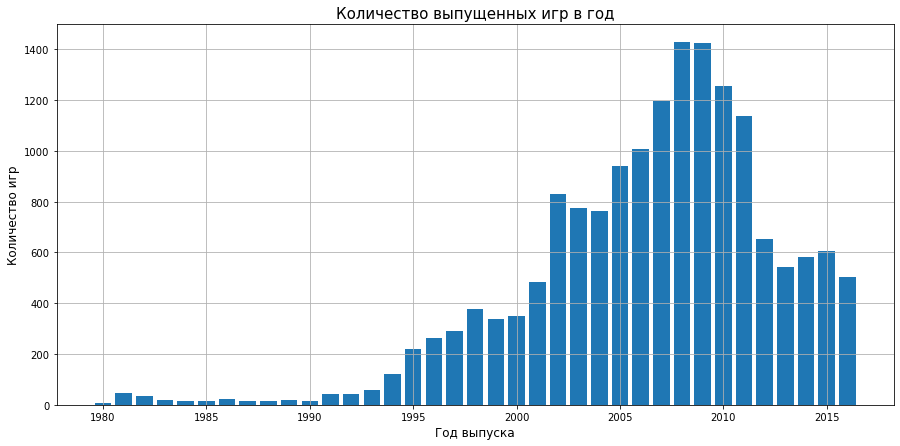

In [13]:
# график списка игр по годам
x=years_games.index
plt.figure(figsize=(15,7))
plt.bar(x, data['year_of_release'].value_counts());
plt.title('Количество выпущенных игр в год',fontsize = 15)
plt.ylabel('Количество игр',fontsize = 12)
plt.xlabel('Год выпуска',fontsize = 12)
plt.grid()

In [14]:
round((len(data[data['year_of_release']<1994]) / data.shape[0]*100), 3) # процент неучтенных игр раньше 1994 года

2.22

Я считаю что данные раньше 1994 года брать не стоит, в год игр выходило меньше сотни. Если мы отбросим данные раньше 1994 года мы потеряем 2.2% от всей массы. Если сюда добавить 1.63% с пропусками, то всего мы избавились от 3.83%. Это допустимо. Можем работать дальше.

In [15]:
act_data = data[data['year_of_release']>=1994] # отбросим данные раньше 1994 года

Больше всего игр вышло в 2008 и 2009 годы.
В 80-х выходило мало игр, индустрия только зарождалась. В 1994 году вышла первая PlayStation, и популярность игр пошла вверх. После 2009 года наблюдается спад количества игр, выходящих в год. 

Мне кажется здесь несколько факторов:
- Увеличение качества продукта, взамен количества. Нацеленность на хиты. 
- Увеличение количества онлайн игр. Ежемесячная плата.
- А так же возможно увеличение количества мобильных игр. Донат.

###  Как менялись продажи по платформам.

In [16]:
act_data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(15) 
# группировка по платформам с суммарными продажами, с сортировкой по убыванию

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       252.66
XB       251.57
N64      218.01
GC       196.73
XOne     159.32
Name: sum_sales, dtype: float64

PS2, X360, PS3, Wii, DS, PS - платформы с наибольшими суммарными продажами.

In [17]:
top_six_platforms = act_data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(6)
# платформы с наибольшими суммарными продажами положим в переменную

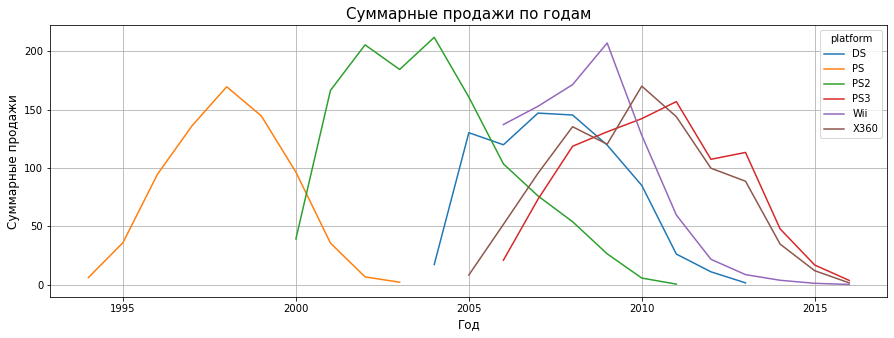

In [18]:
# график 6 самых популярных платформ по продажам
act_platforms = act_data.query('platform in @top_six_platforms.index')
act_platforms = act_platforms.pivot_table(index='platform',values='sum_sales',columns='year_of_release',aggfunc='sum').T

act_platforms.plot(figsize=(15, 5),grid=True);
plt.title ('Суммарные продажи по годам',fontsize = 15);
plt.xlabel('Год', fontsize=12);
plt.ylabel('Суммарные продажи', fontsize=12);

In [19]:
act_platforms.count().mean() # среднее значение лет, за сколько игры выходили на топовых платформах

11.0

In [20]:
all_platforms = act_data.pivot_table(index='platform',values='sum_sales',columns='year_of_release',aggfunc='sum').T
all_platforms.nunique().median() # медианное значение лет, за сколько игры выходили на всех платформах

6.0

Я изучил 6 самых популярных платформ в выборке.
В среднем через 11 лет, после запуска платформа уходит с рынка. Суммарные продажи падают до 0 примерно через 11 лет.

А новые популярные платформы появляются примерно раз в 5-6 лет, когда у старых платформ прошел пик продаж. На спаде старых появляются новые. А так же развиваются технологии, прежняя платформа устаревает со временем.

Но среднее время жизни всех платформ отличается, почти в два раза. Не популярные платформы уходят с рынка намного быстрее. И количество таких платформ в разы больше топовых.

### Фильтр данных по актуальному периоду.

Необходимо определить актуальный период, который поможет составить прогноз на 2017 год.

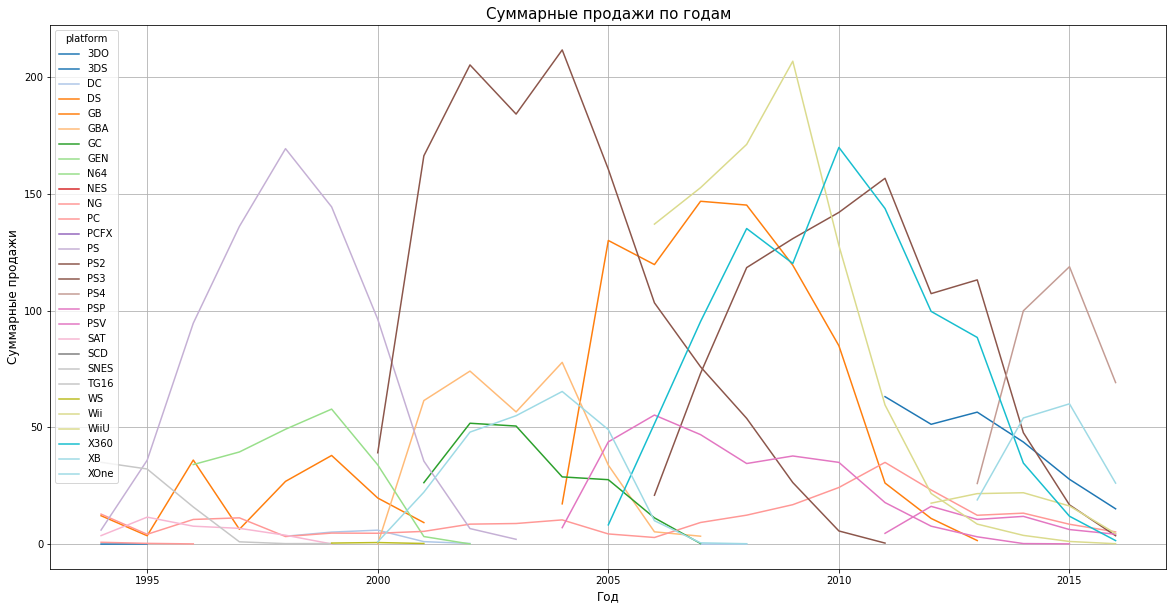

In [21]:
# график суммарных продаж по платформам по годам с 1994 года
period = act_data.pivot_table(index='platform',values='sum_sales',columns = 'year_of_release',aggfunc='sum').T

period.plot(figsize=(20, 10), grid=True, colormap='tab20');
plt.title ('Суммарные продажи по годам',fontsize = 15);
plt.xlabel('Год', fontsize=12);
plt.ylabel('Суммарные продажи', fontsize=12);

На основе графиков "Количество выпущенных игр в год" и "Суммарные продажи по годам" примем актуальный период с 2013 года. В 2013 у большинства платформ виден спад, а у некоторых подъем. Поэтому стоит взять период с 2013 года, так я получу актуальные жанры и пользовательские портреты. Не стоит брать более ранние периоды, так как они никак не повлияют на прогноз 2017 года. Индустрия развивается быстро.

In [22]:
actual_data = data[data['year_of_release']>=2013] # фильтр актуального периода

### Какие платформы лидируют по продажам, растут или падают? Выбор несколько потенциально прибыльных платформ.

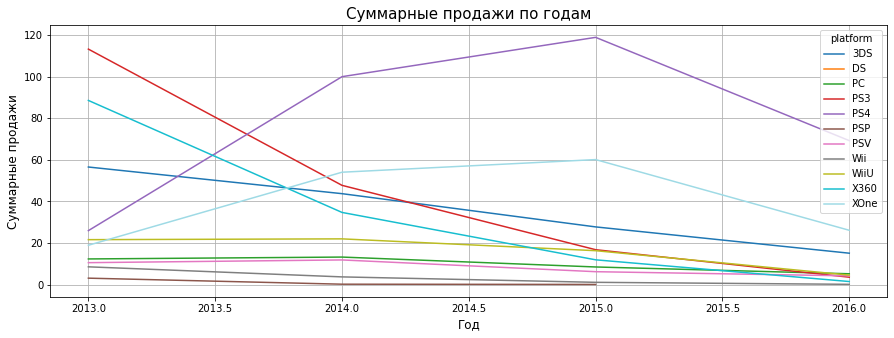

In [23]:
# график суммарных продаж по платформам за аткуальный период
actual_data_platforms = actual_data.pivot_table(index='platform',values='sum_sales',columns = 'year_of_release',aggfunc='sum').T

actual_data_platforms.plot(figsize=(15, 5),grid=True, colormap='tab20');
plt.title ('Суммарные продажи по годам',fontsize = 15);
plt.xlabel('Год', fontsize=12);
plt.ylabel('Суммарные продажи', fontsize=12);

PS4 и XOne выглядят наиболее перспективными платформами, они пришли на замену устаревающего поколения PS3 и X360 соответственно. А это были самые популярные платформы. 

С 2013 года наблюдается рост продаж. У нас указано, что данные за 2016 год могут быть неполными. Это значит что снижение продаж к 2016 году на графике не отражает реальную картину. 

По всем остальным платформам происходит спад.

In [24]:
actual_data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False) 
# группировка по платформам с суммарными продажами, с сортировкой по убыванию за актуальный период

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: sum_sales, dtype: float64

По продажам лидируют PS4, PS3, XOne. PS3 и X360 терят в актуальности, как видно из графика.

К 2017 можно сделать прогноз о лидерстве PS4 и XOne.

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

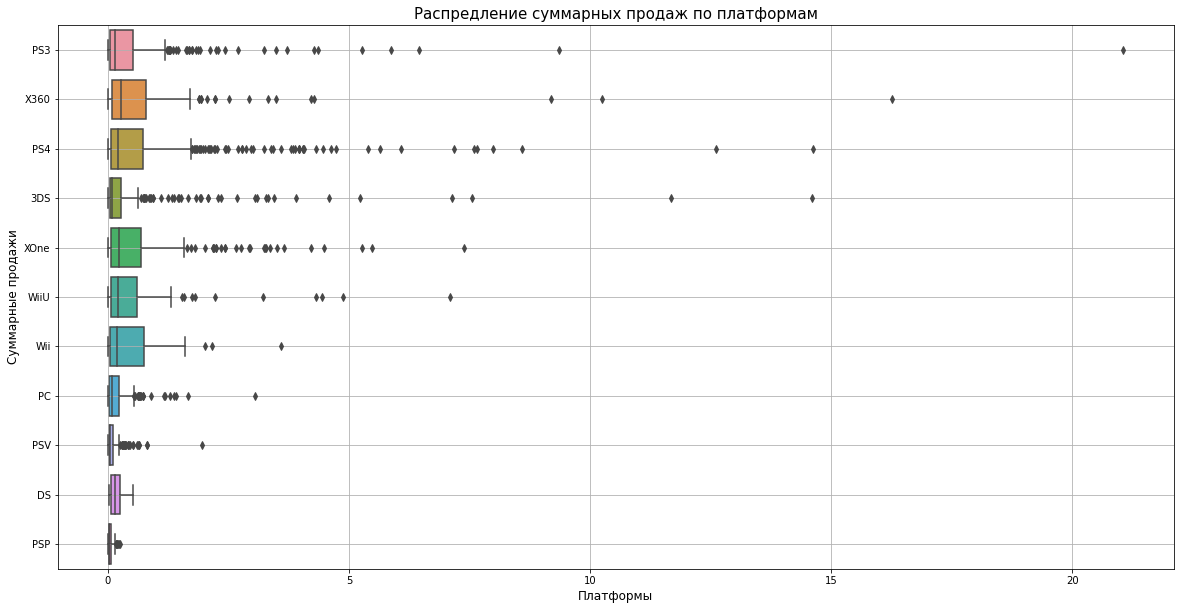

In [25]:
# График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

plt.figure(figsize=(20,10))
sns.boxplot(data=actual_data,y='platform',x='sum_sales');

plt.title ('Распредление суммарных продаж по платформам',fontsize = 15);
plt.xlabel('Платформы', fontsize=12);
plt.ylabel('Суммарные продажи', fontsize=12);
plt.grid(True)

In [26]:
actual_data.sort_values(by='sum_sales',ascending=False).head() # Первые 5 самых продаваемых игр за актуальный период

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Выделяется GTA V, чьи суммарные продажи на PS3 выше 21 млн. копий. А в сумме по трем платформам свыше 50 млн. копий! Остальной график не информативен, отфильтрую по суммарным продажам и построю заново.

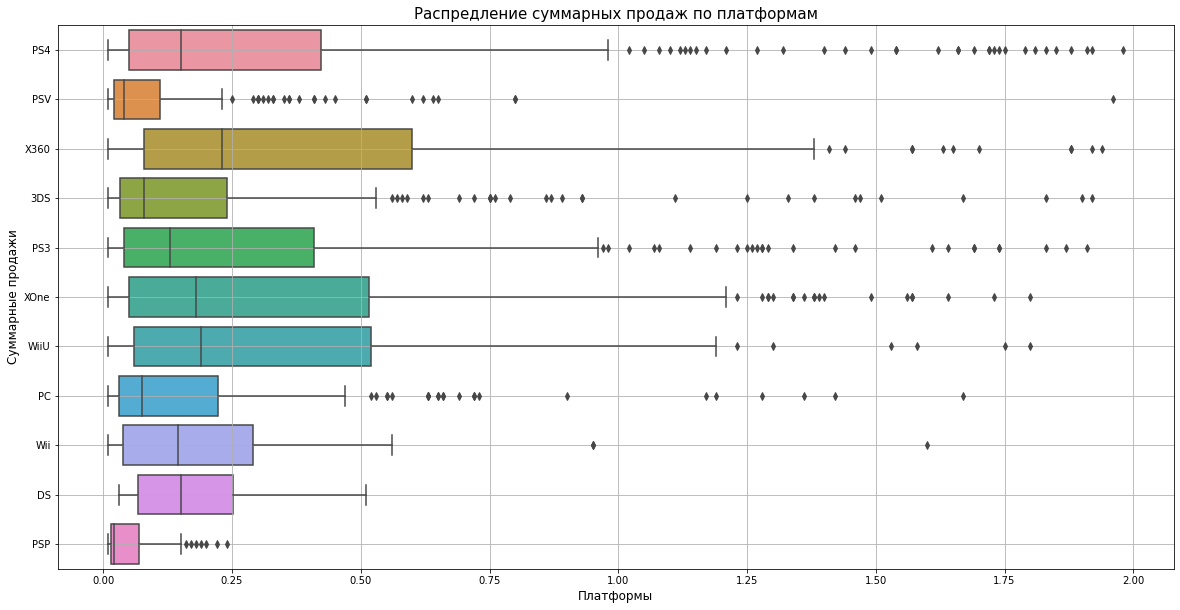

In [27]:
# График «ящик с усами» по глобальным продажам игр в разбивке по платформам, с продажами менее 2 млн. копий.

plt.figure(figsize=(20,10))
sns.boxplot(data=actual_data[actual_data['sum_sales']<2],y='platform',x='sum_sales');

plt.title ('Распредление суммарных продаж по платформам',fontsize = 15);
plt.xlabel('Платформы', fontsize=12);
plt.ylabel('Суммарные продажи', fontsize=12);
plt.grid(True)

* Уходящие платформы, такие как Wii, X360, PS3, еще составляют конкуренцию восходящим.
* Медианы у всех платформ находятся внизу. Можно сделать вывод, что основную часть продаж берут на себя хиты (выбросы).
* У платформы DS выбросов нет вообще.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Возьмем платформу PS4

In [28]:
PS4 = actual_data.query('platform == "PS4" & sum_sales <=1.5') # фильтр по платформе PS4, так же убрал выбросы
PS4.pivot_table(index='name', values=['sum_sales','user_score','critic_score'])
# сводная таблица по оценке пользователей, критиков и суммарных продаж

,critic_score,sum_sales,user_score
name,,,
7 Days to Die,45.0,0.14,5.9
Adventure Time: Finn & Jake Investigations,NaN,0.10,NaN
Aegis of Earth: Protonovus Assault,57.0,0.02,7.8
Agatha Christie's The ABC Murders,67.0,0.02,6.2
Akiba's Trip: Undead & Undressed,NaN,0.11,NaN
...,...,...,...
Yakuza Zero: The Place of Oath,NaN,0.17,NaN
Yakuza: Ishin,NaN,0.15,NaN
Yoru no Nai Kuni,NaN,0.08,NaN


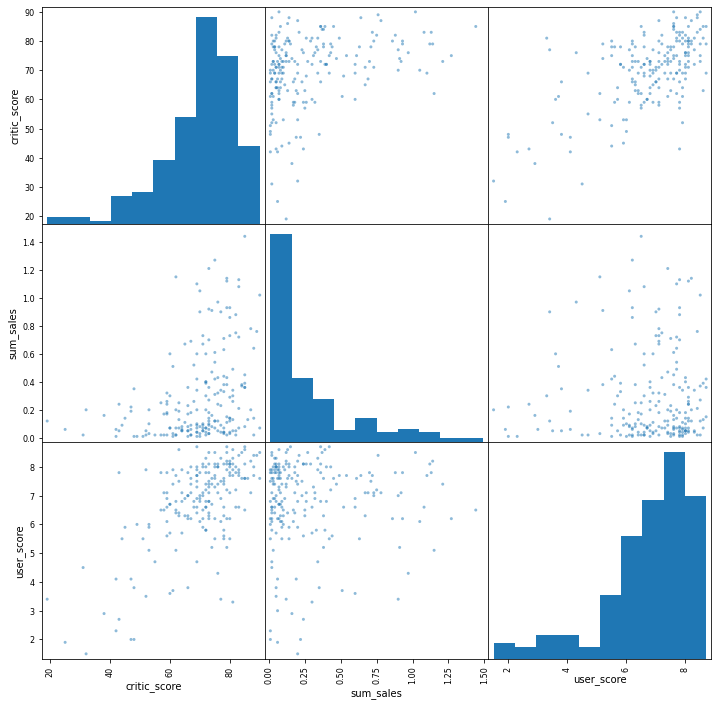

In [29]:
pd.plotting.scatter_matrix(
    PS4.pivot_table(index='name', values=['sum_sales','user_score','critic_score']),figsize=(12,12)) ;
# построение матрицы диаграмм рассеиния

In [30]:
PS4.pivot_table(index='name', values=['sum_sales','user_score','critic_score']).corr() 
# подсчет коэффициента корреляции

,critic_score,sum_sales,user_score
critic_score,1.000000,0.321616,0.636433
sum_sales,0.321616,1.000000,0.023356
user_score,0.636433,0.023356,1.000000


Наблюдается слабая зависимость суммарных продаж от оценки критиков. Но при оценке критиков от 7 и выше, игры как правило достигают больших продаж.

Зависимость суммарных продаж от оценки пользователей почти никакая. И говорить о какой то зависимости сложно. Но наблюдается скопление оценок от 6 и до 9.

Корреляция пользователей и критиков интересна. Чаще они сходятся во мнении при оценке от 7 и выше.

### Сравнение выводов с продажами игр на других платформах.

Сравним главного конкурента PS4: XOne

In [31]:
XOne = actual_data.query('platform == "XOne" & sum_sales <=1.5') # фильтр по платформе XOne, так же убрал выбросы
XOne.pivot_table(index='name', values=['sum_sales','user_score','critic_score'])
# сводная таблица по оценке пользователей, критиков и суммарных продаж

,critic_score,sum_sales,user_score
name,,,
7 Days to Die,35.0,0.05,5.2
Adventure Time: Finn & Jake Investigations,NaN,0.05,NaN
Agatha Christie's The ABC Murders,66.0,0.01,7.5
Alien: Isolation,78.0,0.50,7.8
Angry Birds Star Wars,53.0,0.17,6.9
...,...,...,...
XCOM 2,87.0,0.04,8.1
ZombiU,NaN,0.01,NaN
Zombie Army Trilogy,62.0,0.11,7.2


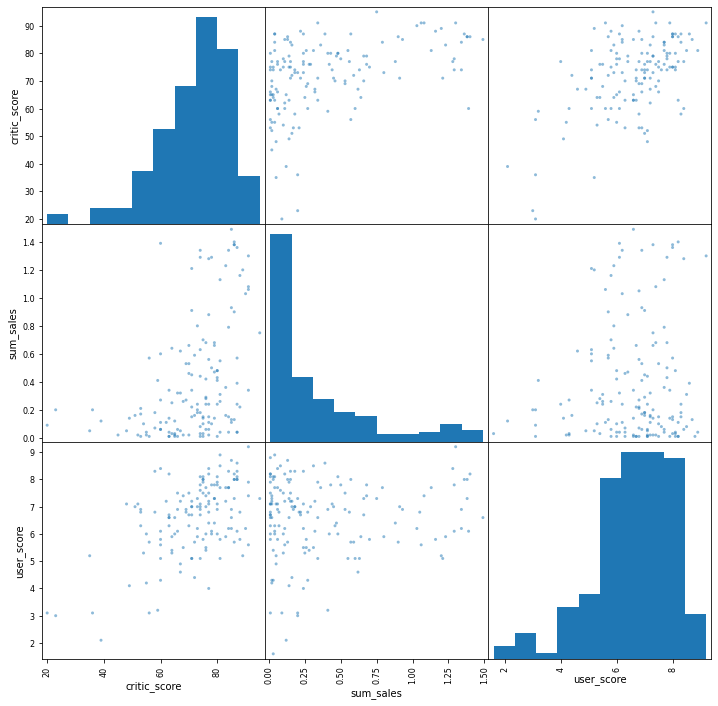

In [32]:
pd.plotting.scatter_matrix(
    XOne.pivot_table(index='name', values=['sum_sales','user_score','critic_score']),figsize=(12,12)) ;
# построение матрицы диаграмм рассеиния

In [33]:
XOne.pivot_table(index='name', values=['sum_sales','user_score','critic_score']).corr() 
# подсчет коэффициента корреляции

,critic_score,sum_sales,user_score
critic_score,1.000000,0.423603,0.547987
sum_sales,0.423603,1.000000,0.073938
user_score,0.547987,0.073938,1.000000


То же самое можно сказать и про платформу XOne. Очень похожие показатели как по оценке критиков, так и пользователей. Разве что, зависимость продаж от оценки критиков чуть больше.

### Просмотр общего распределения игр по жанрам. 

In [34]:
# сводная таблица по жанрам и суммарным продажам, отсортированная по продажам по убыванию
actual_data.pivot_table(index='genre', values='sum_sales',aggfunc={'sum_sales':'sum','genre':'count'}) \
           .sort_values(by='sum_sales', ascending=False)

,genre,sum_sales
genre,,
Action,766,321.87
Shooter,187,232.98
Sports,214,150.65
Role-Playing,292,145.89
Misc,155,62.82
Platform,74,42.63
Racing,85,39.89
Fighting,80,35.31
Adventure,245,23.64


In [35]:
# сводная таблица по жанрам и суммарным продажам, отсортированная по медиане продаж по убыванию
actual_data.pivot_table(index='genre', values='sum_sales',aggfunc={'sum_sales':'median','genre':'count'}) \
           .sort_values(by='sum_sales', ascending=False)

,genre,sum_sales
genre,,
Shooter,187,0.450
Sports,214,0.240
Platform,74,0.225
Role-Playing,292,0.125
Fighting,80,0.125
Racing,85,0.120
Action,766,0.110
Simulation,62,0.100
Misc,155,0.100


Action, Shooter, Sports самые прибыльные жанры. Поэтому существует большой выбор игр этих жанров. И конечно же Action игр больше всех. Можно сказать, что эти жанры требуют большого погружения и реакции от игрока. 

По медиане можно сказать, что жанр Shooter самый прибыльный, просто количество игр меньше, чем у Action, в 6 раз. А отстает от Action всего на 90 млн. копий. А самый популярный Action.

Simulation, Strategy, Puzzle жанры с самыми низкими продажами. Здесь нужно больше сосредоточения.

Я бы дополнительно разделил топ и низ как активные игры и спокойные.

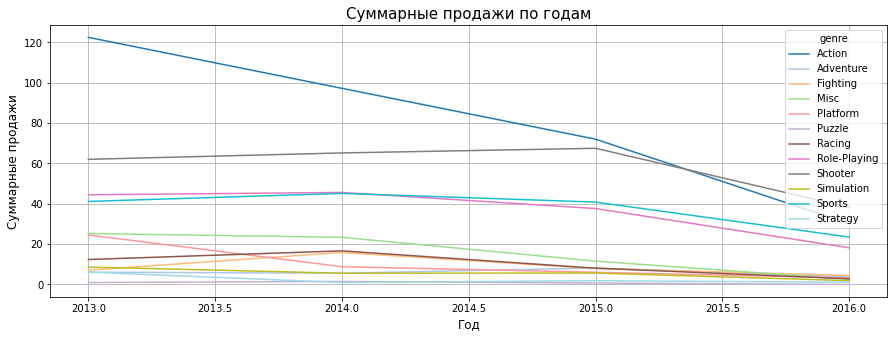

In [36]:
# график суммарных продаж по жанрам по годам
actual_data_genres = actual_data.pivot_table(index='genre',values='sum_sales',columns = 'year_of_release',aggfunc='sum').T

actual_data_genres.plot(figsize=(15, 5), grid=True, colormap='tab20')
plt.title ('Суммарные продажи по годам',fontsize = 15);
plt.xlabel('Год', fontsize=12);
plt.ylabel('Суммарные продажи', fontsize=12);

Action всегда был в топе. С 2015 года Shooter начал обгонять Action.

**Выводы:**

* Принял актуальный период с 2013 года.
* Больше всего игр вышло в 2008 и 2009 годы.
* В среднем популярные платформы живут 11 лет. 
* В среднем по всем платформам срок жизни 6 лет.
* В среднем новые топовые платформы появляются раз в 5-6 лет.
* PS4 и XOne наиболее перспективные платформы. 
* По продажам лидируют PS4, PS3, XOne.
* Суммарные продажи больше зависят от оценки критиков, чем от оценки пользователей.
* Action, Sports, Shooter самые прибыльные жанры.
* Самые активные игры - самые продаваемые. Самые спокойные - замыкают списки по продажам.

## Портрет пользователя каждого региона. 
Для регионов Северной Америки, Европы, Японии.

### Самые популярные платформы (топ-5) каждого региона.

In [37]:
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [38]:
# сводная таблица с платформами по регионам по суммарным продажам
top_platforms_na = actual_data.pivot_table(index='platform', values='na_sales',aggfunc='sum') \
                .sort_values(by='na_sales', ascending=False).head() # сортировка по Америке
top_platforms_eu = actual_data.pivot_table(index='platform', values='eu_sales',aggfunc='sum') \
                .sort_values(by='eu_sales', ascending=False).head() # сортировка по Европе
top_platforms_jp = actual_data.pivot_table(index='platform', values='jp_sales',aggfunc='sum') \
                .sort_values(by='jp_sales', ascending=False).head() # сортировка по Японии
display_side_by_side(top_platforms_na, top_platforms_eu, top_platforms_jp, titles = ['Северная Америка','Европа','Япония'])

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
,eu_sales
platform,
PS4,141.09
PS3,67.81


PS4 лидирует на американском рынке. Далее идут XOne и X360.
Продаж по XOne почти в 2 раза больше, чем на европейском рынке.

В Европе тоже лидирует PS4, но гораздо уверенее, чем в америке. Далее идут PS3 и XOne. Несмотря на то, что PS3 уходящая платформа, она все же опережает XOne. В Европе и Америке список замыкает 3DS.

Япония кардинально отличается от Америки и Европы. Первое место занимает Nintendo.
В топе 5 все приставки выпущенны в Японии. 

Можно сделать вывод, что японские игроки предпочитают платформы из своей страны.

### Самые популярные жанры (топ-5) каждого региона.

In [39]:
# сводная таблица с жанрами по регионам по суммарным продажам
top_genres_na = actual_data.pivot_table(index='genre', values='na_sales',aggfunc='sum') \
          .sort_values(by='na_sales', ascending=False).head() # сортировка по Америке
top_genres_eu = actual_data.pivot_table(index='genre', values='eu_sales',aggfunc='sum') \
          .sort_values(by='eu_sales', ascending=False).head() # сортировка по Европе
top_genres_jp = actual_data.pivot_table(index='genre', values='jp_sales',aggfunc='sum') \
          .sort_values(by='jp_sales', ascending=False).head() # сортировка по Японии
display_side_by_side(top_genres_na, top_genres_eu, top_genres_jp, titles = ['Северная Америка','Европа','Япония'])

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
,eu_sales
genre,
Action,118.13
Shooter,87.86


В Северной Америке самые популярные жанры Action, Shooter, Sports. Этот топ совадает с мировым, на долю Америки приходится большая часть рынка.

Европа не далеко отходит от Америки. Первые четыре жанра идентичны, различается замыкающий пятерку жанр. В Европе больше любят гонки, чем Misc.

Япония выделяется и здесь. Совсем другая тройка лидеров: RPG, Action, Misc. Больше всего в Японии любят ролевые игры. В отличии от других регионов Action на втором месте. Misc('Игры, не вошедшие в другие жанры') на третьем месте. На четвертом месте появился жанр Fighting, чего не было в Европе и Америке.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

In [40]:
actual_data['rating'].value_counts() # количесвто уникальных значений рейтинга игр

M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

In [41]:
# сводная таблица с рейтингом по продажам по регионам
rating_na = actual_data.pivot_table(index='rating', values='na_sales',aggfunc='sum') \
           .sort_values(by='na_sales', ascending=False) # сортировка по Америке
rating_eu = actual_data.pivot_table(index='rating', values='eu_sales',aggfunc='sum') \
           .sort_values(by='eu_sales', ascending=False) # сортировка по Европе
rating_jp = actual_data.pivot_table(index='rating', values='jp_sales',aggfunc='sum') \
           .sort_values(by='jp_sales', ascending=False) # сортировка по Японии
display_side_by_side(rating_na, rating_eu, rating_jp, titles = ['Северная Америка','Европа','Япония'])

,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79
,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69


Северная Америка, тройка лидеров: M, E, E10+

Европа, тройка лидеров: M, E, E10+

Япония, тройка лидеров: T, E, M 

Рейтинг ESRB влияет на на продажи в отдельном регионе! 
У Европы с Северной Америкой нет различий. На первом месте идут игры с рейтингом М. Большинство хитов и крупных проектов как раз выходит с этим рейтингом. Игры для подростков приветствуются меньше всего.

У Японии все по другому: "для подростков", "для всех", "для взрослых". 

Рейтинг "для взрослых" не особо приветствуется в Японии. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. Что связано напрямую с цензурой. Учитывая, что в Японии популярны свои платформы, плюс специфика культуры в стране, можно сделать вывод, что игры "для взрослых" почти не выпускают на Nintendo.

## Проверка гипотез:

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

На основе анализа данных проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Исходя из того, что мы всегда формулируем нулевую гипотезу со знаком равенства, нулевая гипотеза будет звучать следующим образом:

*** H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. ***

Я не могу предположить в какую сторону они будут различаться, поэтому сформулирую двустороннюю альтернативную гипотезу:

*** H1 - Средние пользовательские рейтинги платформ Xbox One и PC различаются. ***

Я буду сравнивать равенство среднего двух генеральных совокупностей по взятым из них выборкам, для этого есть метод scipy.stats.ttest_ind (array1, array2,equal_var).

In [42]:
# сводная таблица по одной платформе XOne с пользовательскими рейтингами
user_score_xbox = actual_data[actual_data['platform']=='XOne'].pivot_table(index='name', values='user_score')
user_score_xbox.shape

(182, 1)

In [43]:
# сводная таблица по одной платформе PC с пользовательскими рейтингами
user_score_pc = actual_data[actual_data['platform']=='PC'].pivot_table(index='name', values='user_score')
user_score_pc.shape

(155, 1)

In [44]:
alpha = 0.05 # пороговое значение альфа
results = st.ttest_ind(user_score_xbox, user_score_pc, equal_var = False) 
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
     print("Отвергаем нулевую гипотезу")
else:
     print("Не получилось отвергнуть нулевую гипотезу")
results

P-value: [0.14759594]
Не получилось отвергнуть нулевую гипотезу


Ttest_indResult(statistic=array([1.45192816]), pvalue=array([0.14759594]))

Не получилось отвергнуть нулевую гипотезу. Результат теста говорит в пользу нулевой гипотезы. А значит мы принимаем гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action и Sports разные.

На основе анализа данных проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные. Исходя из того, что мы всегда формулируем нулевую гипотезу со знаком равенства, нулевая гипотеза будет звучать следующим образом:

*** H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые. ***

Я не могу предположить в какую сторону они будут различаться, поэтому сформулирую двустороннюю альтернативную гипотезу:

*** H1 - Средние пользовательские рейтинги жанров Action и Sports различаются. ***

Я буду сравнивать равенство среднего двух генеральных совокупностей по взятым из них выборкам, для этого есть метод scipy.stats.ttest_ind (array1, array2,equal_var).

In [45]:
# сводная таблица жанра Action с пользовательскими рейтингами
user_score_action = actual_data[actual_data['genre']=='Action'].pivot_table(index='name', values='user_score')
user_score_action.shape

(169, 1)

In [46]:
# сводная таблица жанра Sports с пользовательскими рейтингами
user_score_sports = actual_data[actual_data['genre']=='Sports'].pivot_table(index='name', values='user_score')
user_score_sports.shape

(57, 1)

In [47]:
alpha = 0.05 # пороговое значение альфа
results = st.ttest_ind(user_score_action, user_score_sports, equal_var = False) 
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
     print("Отвергаем нулевую гипотезу")
else:
     print("Не получилось отвергнуть нулевую гипотезу")
results

P-value: [6.67553633e-09]
Отвергаем нулевую гипотезу


Ttest_indResult(statistic=array([6.42363736]), pvalue=array([6.67553633e-09]))

Можно смело отвергать нулевую гипотезу. Даже если мы возьмем пороговое значение меньше (например 0,01), нулевая гипотеза остается маловероятной. Все говорит в пользу альтернативной гипотезы. А значит мы принимаем гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

Я проанализировал данные об играх на плтформах вышедших с 1980 по 2016 и выяснил:

* Больше всего игр вышло в 2008 и 2009 годы.
* Самые популярные платформы в среднем живут 11 лет. Раз в 5-6 лет их сменяет новое поколение топ-платформ. После прохождения пика популярности и развития технологий. В среднем по всем платформам срок жизни 6 лет.
* Для прогнозирования и анализа был принят период с 2013 по 2016 год. 
* В актуальном периоде по продажам лидируют PS4, PS3, XOne.
* Наиболее перспективные платформы к 2017 году PS4 и XOne.
* GTA V - самая популярная игра с суммарными продажами свыше 50 млн. копий по данным до 2016 года.
* При оценке критиков от 8 и выше, игры как правило достигают больших продаж.
* Суммарные продажи больше зависят от оценки критиков, чем от оценки пользователей.
* Action, Sports, Shooter самые прибыльные жанры.
* В Америке и Европе лидирует PS4, в Японии Nintendo.
* В Европе и Америке лидирует жанр Action, в Японии RPG.
* Не получилось **отвергнуть** нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Получилось **принять** гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

На основе вышесказанного можно сделать вывод о том, что успешность игры зависит на какой платформе она вышла. Выпускать стоит на самых популярных платформах на данный момент. Как минимум от компаний PlayStation и Microsoft в Америке и Европе. А в Японии лучше выпускать на Nintendo в первую очередь. Чтобы увеличить продажи игры, можно выпустить сразу на двух поколениях приставок, новом и устаревающем.

Успешность так же зависит от жанра. Action, Sports, Shooter самые прибыльные жанры.

Самый востребованный рейтинг ESRB - «Для взрослых» в Америке и Европе. В Японии «Для подростков».